# WeatherPy
----


Observations:
1. For max. temperatures today, we see that the greatest high temps are above the equator--around 30 degrees. The explanation
for this is that the earth's axis is tilted so that the northern hemisphere is more exposed to the sun than the southern at this time of year.

2. On the humidity plot there's an outlier that's obviously incorrect data retrieved from OpenWeather. There's a place called Paita that's been reporting 290% humidity for the last four days! I consciously did not remove this data point in order to illustrate the importance of "clean" data. 

3. Cloudiness and wind speed do not seem to be dependent on proximity to the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

872317ee75871266bdc3821916ebf76e


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lats = np.random.uniform(low=-90.000, high=90.000, size=20)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [3]:
# Create a dataframe based on the list of cities.
cities_df = pd.DataFrame(cities, columns =['Cities']) 
cities_df.head()

,Cities
0,kaitangata
1,vestmannaeyjar
2,glace bay
3,mataura
4,cidreira


In [4]:
# Add columns to the dataframe for storing values from API response.
cities_df['Cloudiness'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Long'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""


cities_df.head()

,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,kaitangata,,,,,,,
1,vestmannaeyjar,,,,,,,
2,glace bay,,,,,,,
3,mataura,,,,,,,
4,cidreira,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set up the inputs to the API call
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": 'Imperial'
}

# Print header for output.
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # Get city name from df
    q = row['Cities']

    # add keyword to params dict
    params['q'] = q

    # assemble url and make API request
    print(f"Processing record {index} | {q}")
    response = requests.get(base_url, params=params).json()
    # print(response)
    # print(json.dumps(response, indent=4, sort_keys=True))
       
    try:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Long'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    
   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 0 | kaitangata
Processing record 1 | vestmannaeyjar
Processing record 2 | glace bay
Processing record 3 | mataura
Processing record 4 | cidreira
Processing record 5 | carnarvon
Processing record 6 | nantucket
Processing record 7 | mar del plata
Processing record 8 | saskylakh
Processing record 9 | saint-pierre
Processing record 10 | bluff
Processing record 11 | black forest
Processing record 12 | cape town
Processing record 13 | tuktoyaktuk
Processing record 14 | bengkulu
City not found... skipping.
Processing record 15 | bethel
Processing record 16 | ponta do sol
Processing record 17 | port alfred
Processing record 18 | sedelnikovo
City not found... skipping.
Processing record 19 | souillac
Processing record 20 | illoqqortoormiut
City not found... skipping.
Processing record 21 | satitoa
City not found... skipping.
Processing record 22 | dehloran
Processing record 23 | ushuaia
Proces

Processing record 225 | prince rupert
Processing record 226 | sistranda
Processing record 227 | gambela
Processing record 228 | santa maria
Processing record 229 | katsuura
Processing record 230 | aviles
Processing record 231 | viedma
Processing record 232 | dwarka
Processing record 233 | fortuna
Processing record 234 | victoria
Processing record 235 | fairbanks
Processing record 236 | kil
Processing record 237 | hervey bay
Processing record 238 | junin
Processing record 239 | ormara
Processing record 240 | baghdad
Processing record 241 | olinda
Processing record 242 | haftoni
Processing record 243 | mahebourg
Processing record 244 | san
Processing record 245 | liwale
Processing record 246 | okhotsk
Processing record 247 | yumen
Processing record 248 | khani
Processing record 249 | maldonado
Processing record 250 | smithers
Processing record 251 | ceres
Processing record 252 | port blair
Processing record 253 | shakawe
Processing record 254 | zhuhai
Processing record 255 | warqla
City 

Processing record 449 | norman wells
Processing record 450 | bathsheba
Processing record 451 | sentyabrskiy
City not found... skipping.
Processing record 452 | bossangoa
Processing record 453 | baft
Processing record 454 | huejuquilla el alto
Processing record 455 | stokmarknes
Processing record 456 | mandan
Processing record 457 | narsaq
Processing record 458 | los llanos de aridane
Processing record 459 | hami
Processing record 460 | tokur
Processing record 461 | mercedes
Processing record 462 | beloha
Processing record 463 | manicore
Processing record 464 | tabuk
Processing record 465 | cabedelo
Processing record 466 | aflu
City not found... skipping.
Processing record 467 | bonavista
Processing record 468 | santa rosa
Processing record 469 | udachnyy
Processing record 470 | batagay-alyta
Processing record 471 | ilulissat
Processing record 472 | teeli
Processing record 473 | marcona
City not found... skipping.
Processing record 474 | kisaran
Processing record 475 | aripuana
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Save data to csv
cities_df.to_csv("citiesData.csv")
cities_df.head(15)

# Remove records with NULLs to avoid ValueError when plotting.
noNulls_df = cities_df[cities_df.Cloudiness != '']
noNulls_df.head(10)

,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,kaitangata,42,1562856381,90,-46.28,169.85,44.01,1.99
1,vestmannaeyjar,90,1562856382,87,63.44,-20.27,53.6,17.22
2,glace bay,90,1562856219,81,46.2,-59.96,64.99,19.46
3,mataura,65,1562856382,95,-46.19,168.86,43,3
4,cidreira,100,1562856383,61,-30.17,-50.22,68.27,2.68
5,carnarvon,0,1562856383,15,-30.97,22.13,67.01,13.78
6,nantucket,20,1562856306,69,41.28,-70.1,82.99,13.87
7,mar del plata,12,1562856383,68,-46.43,-67.52,41.09,12.53
8,saskylakh,100,1562856384,93,71.97,114.09,54.05,2.04
9,saint-pierre,0,1562856384,32,48.95,4.24,84.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
# To get a date for the plot title, convert date of first row. Use
firstDate = noNulls_df.iloc[0,2]
# type(firstDate)

# https://stackoverflow.com/questions/12458595/convert-timestamp-since-epoch-to-datetime-datetime/12458703
timeStamp = time.strftime("%D", time.localtime(firstDate))
print(timeStamp)


07/11/19


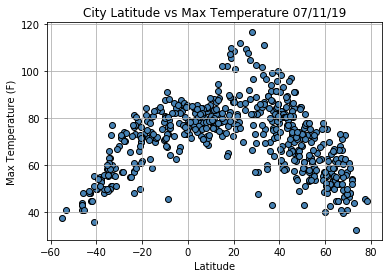

In [8]:
# Add title and labels for each axis.
plt.title("City Latitude vs Max Temperature " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
maxTempY = noNulls_df['Max Temp']

# Plot each scatter using the variables.
maxTempScatter = plt.scatter(latX, maxTempY, marker='o', color='steelblue', edgecolors='0')
  
# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsTemp.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

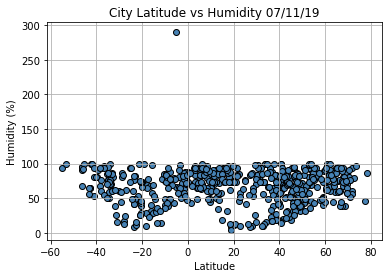

In [9]:
# Add title and labels for each axis.
plt.title("City Latitude vs Humidity " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
humidityY = noNulls_df['Humidity']


# Plot each scatter using the variables.
humidityScatter = plt.scatter(latX, humidityY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsHumid.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Cloudiness Plot

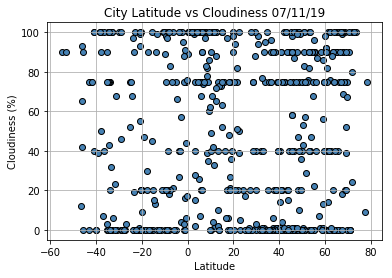

In [11]:
# Add title and labels for each axis.
plt.title("City Latitude vs Cloudiness " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
cloudinessY = noNulls_df['Cloudiness']


# Plot each scatter using the variables.
cloudinessScatter = plt.scatter(latX, cloudinessY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsCloud.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Wind Speed Plot

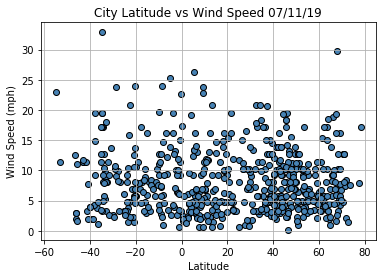

In [12]:
# Add title and labels for each axis.
plt.title("City Latitude vs Wind Speed "  + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
speedY = noNulls_df['Wind Speed']


# Plot each scatter using the variables.
windSpeedScatter = plt.scatter(latX, speedY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsWind.png', bbox_inches='tight')

plt.show()